#  Propagation of truncated bessel beam using Angular Spectrum Method

## Angular Spectrum Method

The complex amplitude u can be decomposed using fourier transform at z = 0 aperture plane as follows

\begin{equation}
    u(x,y,0)=\int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty}  A(f_x,f_y) ~ e^{2\pi j(f_x x + f_y y)}~df_x df_y 
\end{equation}

Therefore,
1)
\begin{equation}
    {A(k_x, k_y) = \mathcal{F}[u(x,y,0)]}
\end{equation} 

From the theory of Angular spectrum analysis of beam propagation the complex amplitude u(x,y,z) at any other plane at z=z can be found by inverse fourier transform as follows



$$u(x,y,z) = \int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty} \left[A(k_x, k_y) e^{- i z \sqrt{k^2-k_x^2-k_y^2} }\right] e^{j2\pi(f_x x + f_y y)} df_x df_y$$


Hence we have
2)
\begin{equation}
    {u(x,y,z) = \mathcal{F}^{-1}\left[A(k_x, k_y) e^{- i z \sqrt{k^2-k_x^2-k_y^2} }\right]}
\end{equation}

I have used the following formulas for beam propagation of truncated bessel beam

1) $    {A(k_x, k_y) = \mathcal{F}[u(x,y,0)]} $

2) $
    {u(x,y,z) = \mathcal{F}^{-1}\left[A(k_x, k_y) e^{- i z \sqrt{k^2-k_x^2-k_y^2} }\right]}$

where $A(k_x,k_y)$ is the angular spectrum of the initial complex amplitude u(x,y,z=0)


## Propagation of Truncated bessel beam

In [20]:

import numpy as np
import scipy as sp
from scipy.fft import fft2,ifft2,fftfreq,fftshift
import imageio
import scipy.special as sp

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import animation
from matplotlib.animation import PillowWriter
import pint

u = pint.UnitRegistry()

In [21]:
n = 1
m = 2*np.pi
x = np.linspace(-5,5,2000)*u.mm
xv,yv = np.meshgrid(x,x)

/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


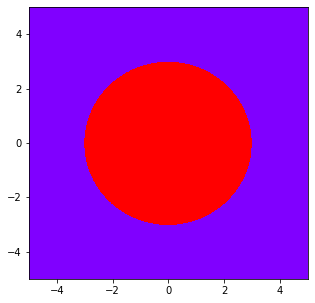

In [22]:
# Plotting the aperture used for truncation of bessel beam

circ = np.sqrt(xv**2 + yv**2)<3*u.mm
U01 = circ.astype(float)
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,U01,cmap='rainbow')

/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


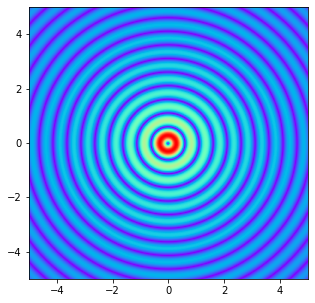

In [23]:
#Plotting the ideal bessel beam


k = np.linspace(-5,5,2000)
xv1,yv1 = np.meshgrid(k,k)
R = np.sqrt((xv1**2)+(yv1**2))
U021 = sp.jv(n,m*R)*(xv1/R + 1j* yv1/R)**n
U02 = U021*u.mm
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,np.abs(U02),cmap='rainbow')

/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


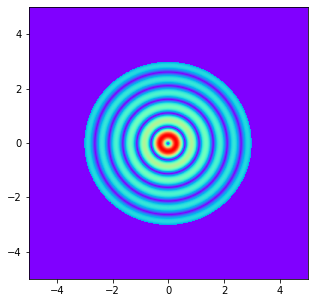

In [24]:
#plotting the truncated bessel beam in xy plane at aperture plane (i.e. at z=0cm)

U0 = U01 * U02
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,np.abs(U0),cmap='rainbow')
plt.show()

In [25]:
A = fft2(U0)
kx = fftfreq(len(x),np.diff(x)[0])*2*np.pi
kxv,kyv = np.meshgrid(kx,kx)


/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.


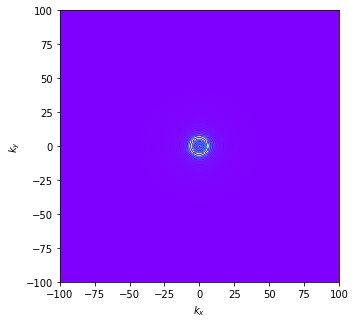

In [26]:
#plotting the fourier transform (formula 1)

plt.figure(figsize=(5,5))
plt.pcolormesh(fftshift(kxv.magnitude),fftshift(kyv.magnitude),np.abs(fftshift(A)),cmap='rainbow')
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.show()

In [27]:
def get_U(z,k):
    return ifft2(A*np.exp(1j*z*np.sqrt(k**2-kxv**2-kyv**2)))

# This function gives complex amplitude (formula 2) of the beam of propagation vector k at propagation distance z (cm)

### Now we plot the diffraction pattern of truncated bessel beam at different propagtion distances z from the aperture

/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if __name__ == '__main__':


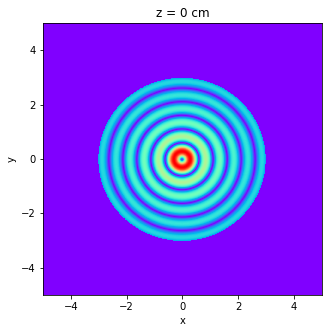

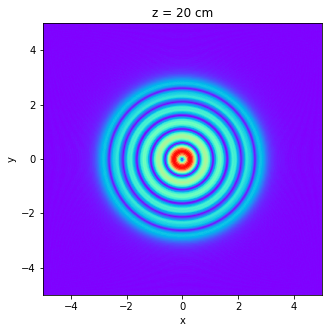

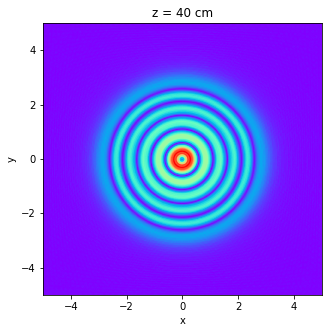

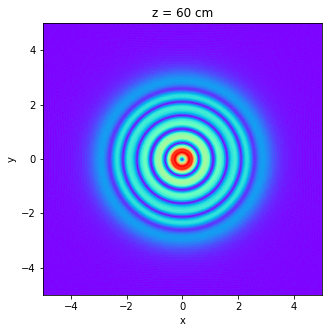

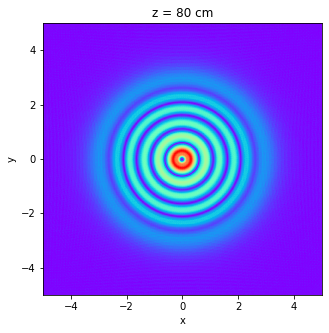

In [28]:
lam = 660*u.nm    #wavelength of the beam = 660nm
k = 2*np.pi/lam   #propagation vector magnitude
z = np.arange(0,100,20) #distances in cm at which diffraction pattern in found
for i in z:
    z1 = i*u.cm
    U = get_U(z1,k)     #getting diffraction pattern at distance z1 cm
    plt.figure(figsize=(5,5))
    #plt.plot(xv,np.abs(U))
    plt.pcolormesh(xv,yv,np.abs(U),cmap='rainbow')
    plt.title('z = '+str(i)+' cm')
    plt.xlabel('x')
    plt.ylabel('y')
    #plt.xlim(-2,2)
    #plt.ylim(-2,2)
    plt.show()

We can also see the 2D cross section of the diffraction pattern in say x=0 plane

/home/kanan/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


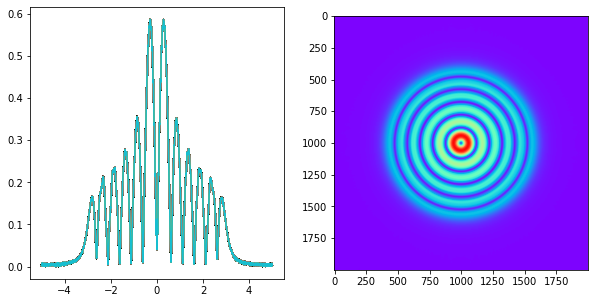

In [29]:
z1 = 20*u.cm
U = get_U(z1,k)     #get the diffraction pattern at z=20cm distance from the aperture
fig = plt.figure(figsize=(10,5))
c = np.abs(U)

plt.subplot(121)
plt.plot(yv,c[1000])    #plotting cross section in yz plane of diffraction pattern on RHS




plt.subplot(122)         
plt.imshow(c,cmap='rainbow')   #plotting the diffraction pattern



plt.show()
